## HomeWork 1 Due at Mid-night 3/10/2021

### This homework is on Exploratory Data Analysis and will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [132]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [133]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Professor Salaries dataset ##

In [134]:
df = pd.read_csv("Salaries1.csv")
print(df.shape)
df.head()

(401, 6)


,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18,Male,139750
1,Prof,B,20.0,16,Male,173200
2,AsstProf,B,4.0,3,Male,79750
3,Prof,B,45.0,39,Male,115000
4,Prof,B,40.0,41,Male,141500


In [135]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
396,Prof,A,33.0,30,Male,103106
397,Prof,A,31.0,19,Male,150564
398,Prof,A,42.0,25,Male,101738
399,Prof,A,25.0,15,Male,95329
400,AsstProf,A,8.0,4,Male,81035


In [136]:
df.Discipline.unique()

array(['B', 'A'], dtype=object)

In [137]:
df.Rank.unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

## Question 1. Check if there are any nulls or NA's.

In [138]:
# **Type in your code here**
# Checking if there are any null values
df.isnull().values.any()

True

## Question 2. Remove any rows that have nulls or NA's.

In [139]:
# **Type in your code here**
df.dropna(inplace = True)
# checking for null values after dropping
df.isnull().values.any()

False

## Question 3. Check if there are any outliers in all numerical fields using scatter plots and boxplots.

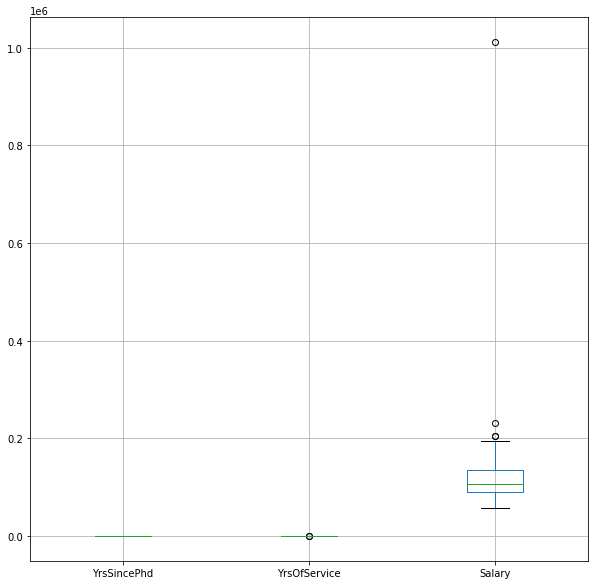

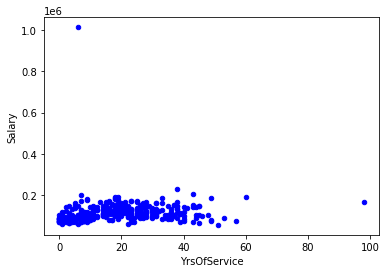

In [140]:
# **Type in your code here**
box = df.boxplot(figsize = (10, 10))
scatter = df.plot.scatter(x = 'YrsOfService', y = 'Salary', c = 'blue')

## Question 4. Display and remove the outlier rows. 

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

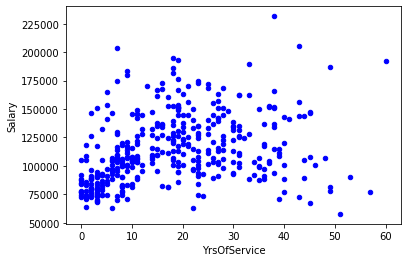

In [141]:
# **Type in your code here**
cond1 = df['Salary'] >= 1000000
cond2 = df['YrsOfService'] < 20

# dropping outlier in salary
df[cond1 & cond2]
# index number 171 was the outlier so we drop
df.drop([171], inplace = True)

# dropping outlier in Yrs of Service
cond1 = df['YrsOfService'] > 80
df[cond1]

# index 95 was the outlier so we drop
df.drop(95, inplace = True)

df.plot.scatter(x = 'YrsOfService', y = 'Salary', c = 'blue')

## Question 5. Calculate the average years of service for each rank using SQL. Then, Calculate the average years of service for each sex using SQL.

In [142]:
# **Type in your code here**
df.head()
sql = 'select rank, avg(YrsOfService) from df group by Rank'
q = ps.sqldf(sql)
q

,Rank,avg(YrsOfService)
0,AssocProf,11.953125
1,AsstProf,2.373134
2,Prof,22.815789


In [143]:
query1 = "select Sex, avg(YrsOfService) from df group by Sex"
q2 = ps.sqldf(query1)
q2

,Sex,avg(YrsOfService)
0,Female,11.564103
1,Male,18.273743


## Question 6. Calculate the average salary by discipline using SQL. Then, calculate the average salary by sex using SQL.

In [144]:
# **Type in your code here**
sql3 = "select Discipline, avg(Salary) from df group by Discipline"
q3 = ps.sqldf(sql3)
q3

,Discipline,avg(Salary)
0,A,108548.430939
1,B,118028.694444


In [145]:
sql4 = "select Sex, avg(salary) from df group by Sex"
q4 = ps.sqldf(sql4)
q4

,Sex,avg(salary)
0,Female,101002.410256
1,Male,115090.418994


## Question 7. For each rank, calculate the number of occurences, the mean salary, the minimum salary, and the maximum salary using one SQL statement.

In [146]:
# **Type in your code here**
sql5 = "select count(salary) as occurences, min(salary) as min, max(salary) as max, avg(salary) as mean from df"
q5 = ps.sqldf(sql5)
q5

,occurences,min,max,mean
0,397,57800,231545,113706.458438


## Question 8. Answer Question 7 using Pandas functions

In [156]:
# **Type in your code here**
low = df['Salary'].min()
hi = df['Salary'].max()
avg = df['Salary'].mean()
c = len(df.index)

data = [{'Min' : low}, {'Max' : hi}, {'Mean' : avg}, {'Count' : c}]
q7 = pd.DataFrame([[c, low, hi, avg]], columns=['Count', 'Min', 'Max', 'Mean'])
q7

,Count,Min,Max,Mean
0,397,57800,231545,113706.458438


## Question 9. Calculate the standard deviation, skew and kurtosis for YrsSincePhd, YrsOfService and salary for each rank.

In [122]:
# **Type in your code here**

print("Years Since Phd: ")
yrs_phd = df.groupby('Rank')['YrsSincePhd'].describe()
yrs_phd['Kurt'] = df['YrsSincePhd'].kurtosis().tolist()
yrs_phd['Skew'] = df['YrsSincePhd'].skew().tolist()
yrs_phd = pd.DataFrame(yrs_phd)
print(yrs_phd.to_string())
print()

print("Years of Service: ")
yrs_service = df.groupby('Rank')['YrsOfService'].describe()
yrs_service['Kurtosis'] = df['YrsOfService'].kurtosis().tolist()
yrs_service['Skew'] = df['YrsOfService'].skew().tolist()
yrs_service = pd.DataFrame(yrs_service)
print(yrs_service.to_string())
print()

print("Salary: ")
salary = df.groupby('Rank')['Salary'].describe()
salary['Kurtosis'] = df['Salary'].kurtosis().tolist()
salary['Skew'] = df['Salary'].skew().tolist()
salary = pd.DataFrame(salary)
print(salary.to_string())


Years Since Phd: 
           count       mean        std   min   25%   50%    75%   max      Kurt     Skew
Rank                                                                                    
AssocProf   64.0  15.453125   9.652584   6.0  10.0  12.0  17.25  49.0 -0.794417  0.30088
AsstProf    67.0   5.104478   2.541381   1.0   3.5   4.0   7.00  11.0 -0.794417  0.30088
Prof       266.0  28.300752  10.108830  11.0  20.0  28.0  36.75  56.0 -0.794417  0.30088

Years of Service: 
           count       mean        std  min   25%   50%   75%   max  Kurtosis      Skew
Rank                                                                                   
AssocProf   64.0  11.953125  10.100180  1.0   7.0   8.0  11.0  53.0 -0.311423  0.650569
AsstProf    67.0   2.373134   1.495811  0.0   1.0   3.0   3.0   6.0 -0.311423  0.650569
Prof       266.0  22.815789  11.590493  0.0  15.0  21.0  30.0  60.0 -0.311423  0.650569

Salary: 
           count           mean           std      min        25%  

## Question 10. Plot the histogram of YrsOfService and Salary for different Ranks using 5 bins

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

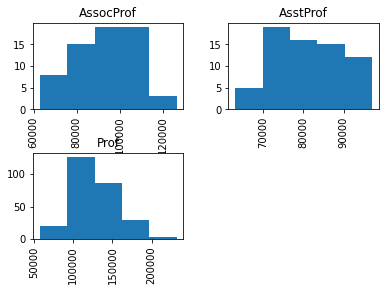

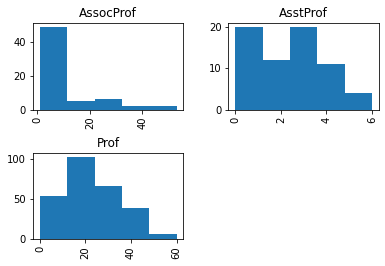

In [26]:
# **Type in your answer here**
df['Salary'].hist(by = df['Rank'], bins = 5)
df['YrsOfService'].hist(by = df['Rank'], bins = 5)

## Question 11. Describe the YrsOfService and Salary distributions for each rank. Use the skew and kurotsis in your descriptions.
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

<!-- # **Type in your answer here**
df.head()
# Skew of Salary: 0.71456845319916
# Skew of Years of Service: 0.6505694795470155

# Kurtosis of Years of Service: -0.31142321220410185
# Kurtosis of Salary: 0.215350237085985 -->

### Answer: 
kurtosis and skew for `salary` is positive however, skew for `years of service` is positive but kurtosis is negative
The positive skew for `Salary` tells us that the data peak is towards the right. Which means more people have a higher salary than the mean.
The positive Kurtosis shows us that the peak of our data is higher than the normal curve. Meaning the mean value is higher,


The skew for `Years of Service` is positive which means that there are more people with higher number of years of service compared to the mean. 
The negative kurtosis shows us that on the peak is low which means the value of mean is low.

## Question 12. Calculate correlations of all the factors among themselves and determine which factors among YrsSincePhd or YrsOfService will affect Salary the most. Will your answers change if you break it down by Sex and by Discipline?

In [268]:
# **Type in your code here**
df.corr()
# I think "YrsSincePhd" will have a bigger impact
# Yes our answers will change if we break it down because each key will be more valuable since there will be less total number 
# of keys.

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909649,0.419231
YrsOfService,0.909649,1.000000,0.334745
Salary,0.419231,0.334745,1.000000


### Now Load a different dataset (MPG dataset number 3)

In [260]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [264]:
mpg.isnull().any()
# Cecking which values are null

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [271]:
#  replacing the null values with the mean of each column
mean_horse = mpg['horsepower'].mean()
print(mean_horse)
mpg['horsepower'].fillna(mean_horse, inplace = True)

105.59398496240603


In [283]:
# replaceing the last null column
mean_wt = mpg['displacement'].mean()
print(mean_wt)
mpg['weight'].fillna(mean_wt, inplace = True)

194.50493827160494


In [287]:
mean_mpg = mpg['mpg'].mean()
print(mean_mpg)
mpg['mpg'].fillna(mean_mpg, inplace = True)

23.645544554455444


In [288]:
# Checking if all the null columns got filled
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [ ]:
# All rolumns will nulls are filled